In [14]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from local_plot import *
from utils import *
def read(folder, nodes):
    paths = {}
    paths_pgo = {}
    t0 = None
    for i in nodes:
        output_folder = folder + str(i) + "/"
        _paths, t0 = read_paths(output_folder, nodes, t0=t0)
        _paths_pgo, t0 = read_paths(output_folder, nodes, prefix="pgo", t0=t0)
        paths[i] = _paths[i]
        paths_pgo[i] = _paths_pgo[i]
    return paths, paths_pgo

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


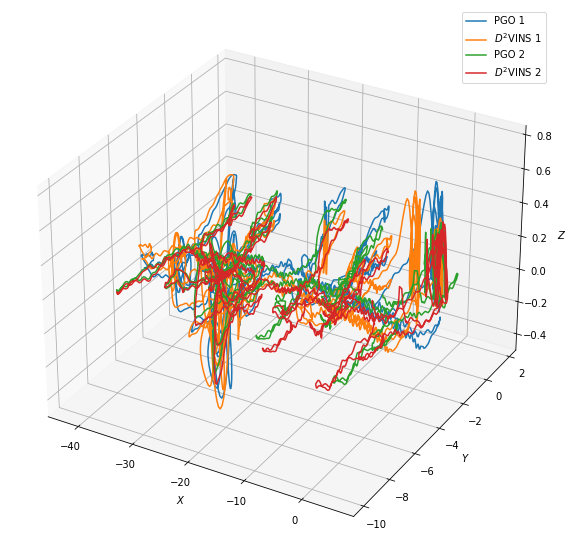

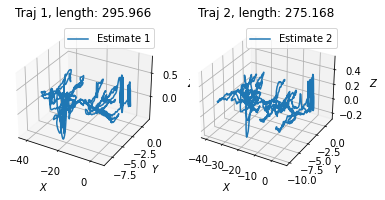

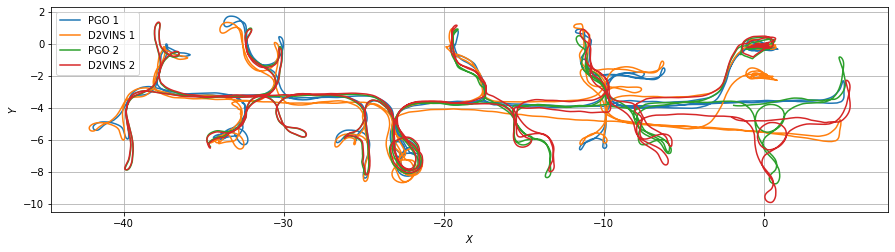

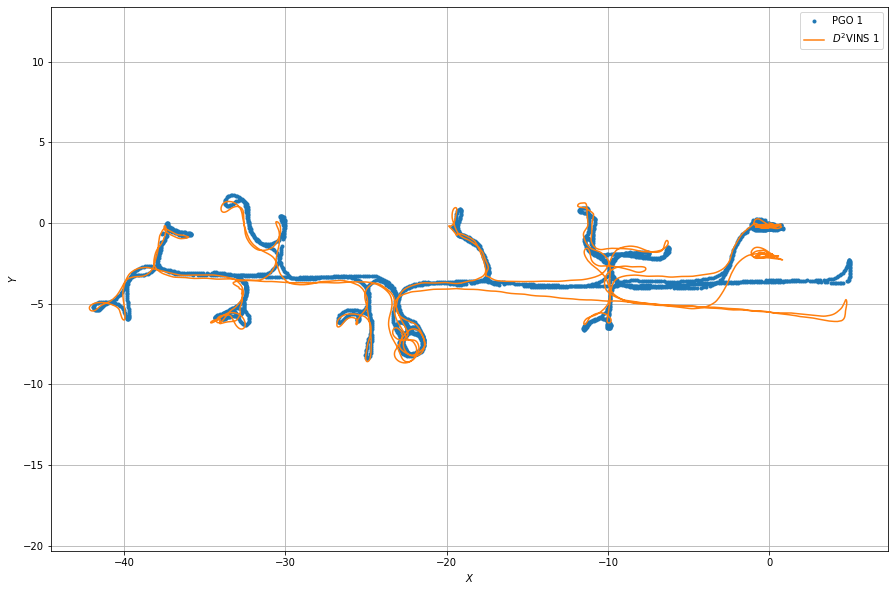

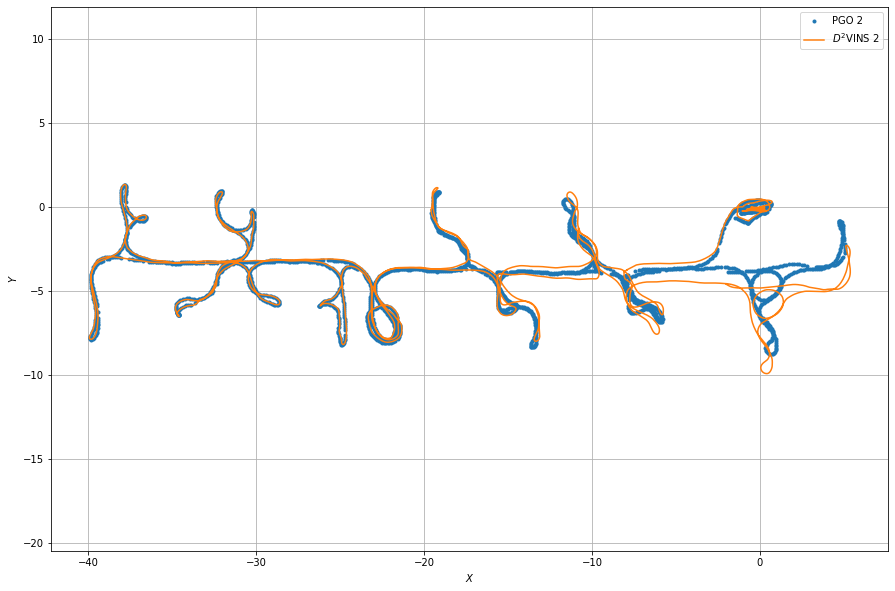

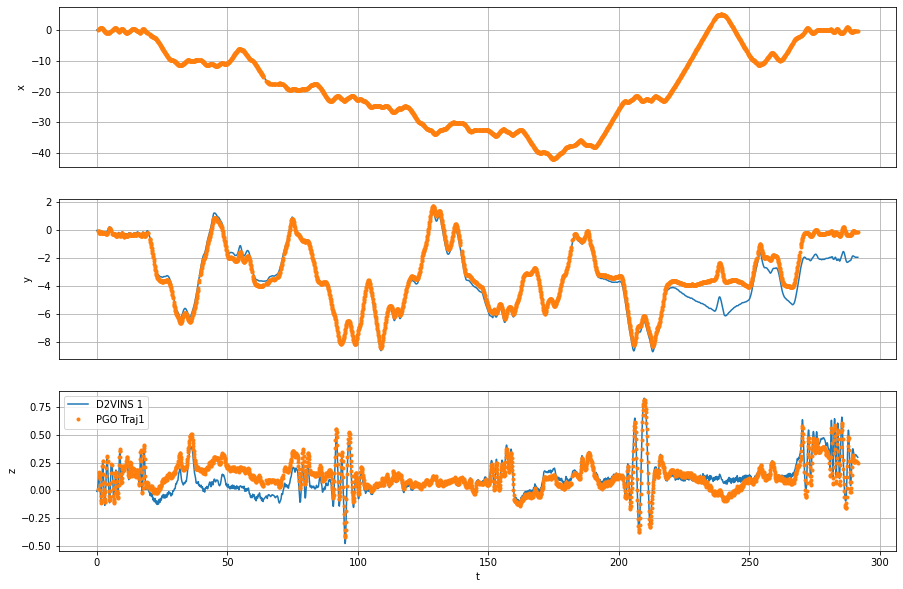

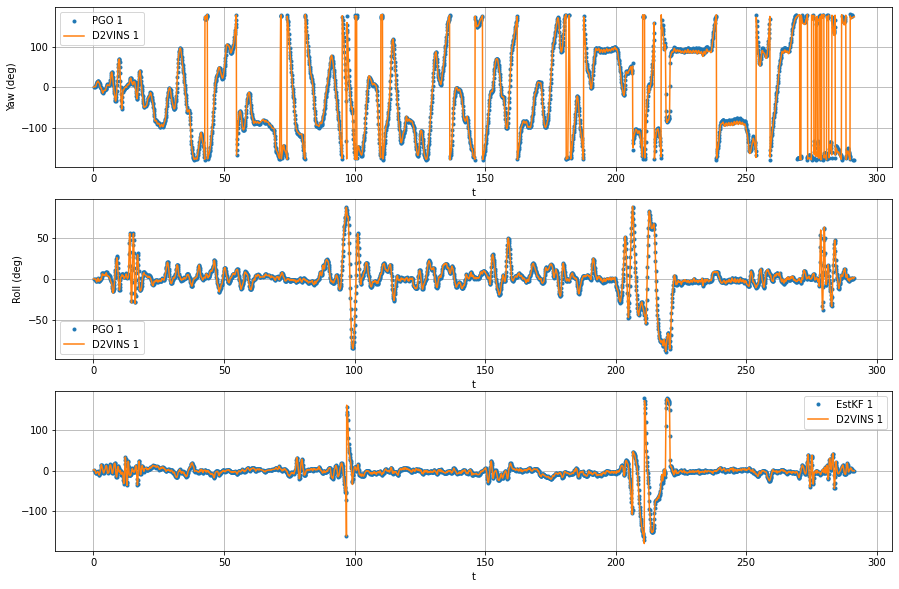

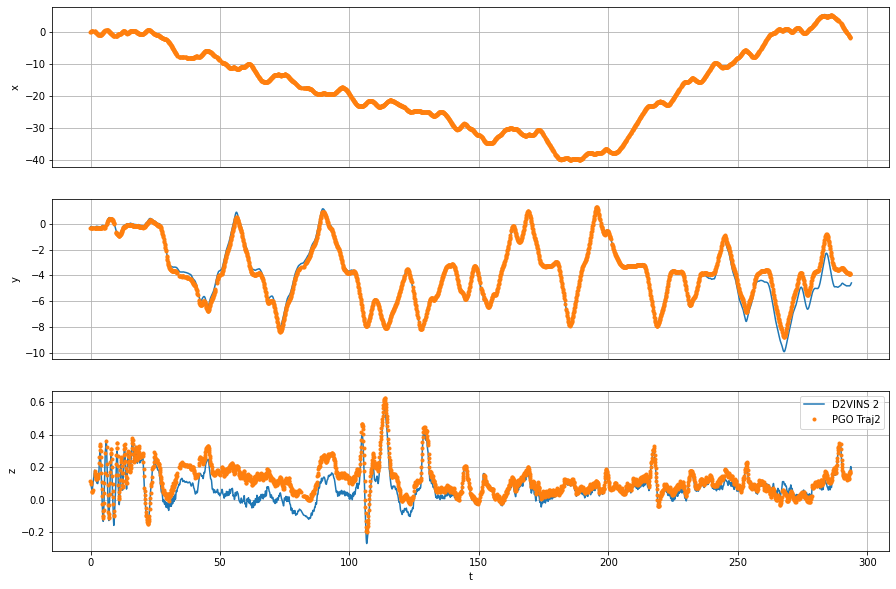

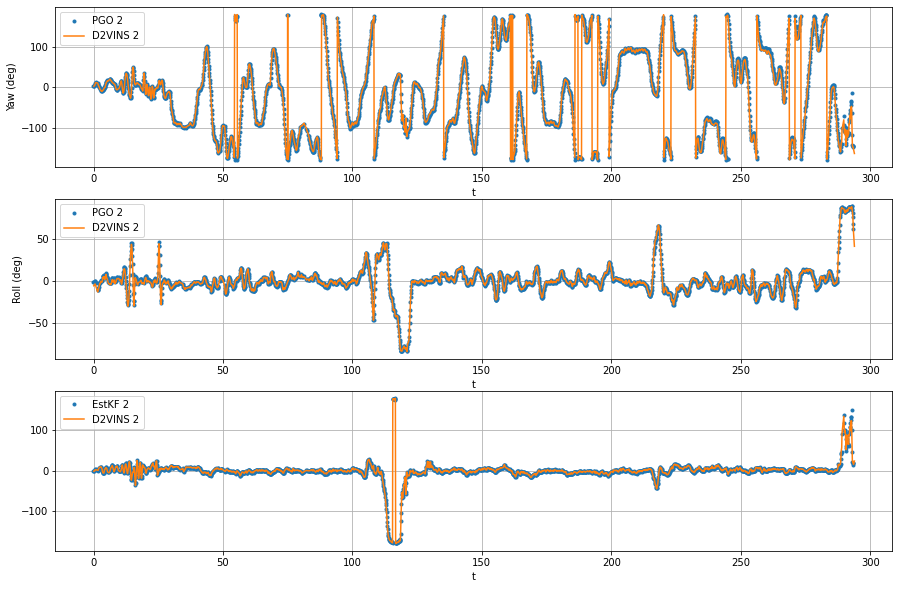

In [18]:
nodes = [1, 2]
output_folder = "/home/xuhao/data/d2slam/tum_corr/outputs/d2slam/swarm"
data_folder="/home/xuhao/data/d2slam/tum_corr/"
dte = 140
paths_gt, t0 = read_paths(data_folder, nodes, prefix="groundtruth")
paths, paths_pgo = read(output_folder, nodes)

plot_fused(nodes, paths, None, poses_pgo=paths_pgo, figsize=(15,10))

